In [100]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import h5py
import os
import seaborn as sns


In [101]:
from scf_runs import run_casci, run_lda_carbon
scf_checkfile, opt_checkfile, mf_lda = run_lda_carbon()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=1, ncas =3, nelecas = (2,0))

C atom neutral LDA spin=2
HF
converged SCF energy = -37.686544437314  <S^2> = 2.0063146  2S+1 = 3.0042068
LDA
converged SCF energy = -37.4577832079298  <S^2> = 2.00163  2S+1 = 3.0010865
CASCI nelecas up/down (2, 0)
CASCI E = -37.6804935852315  E(CI) = -1.34236284526288  S^2 = 2.0000000
Available output from CASCI: <KeysViewHDF5 ['ci', 'fci', 'mo_coeff', 'ncas', 'nelecas']>


In [102]:
import bosonrecipes
import importlib, bosonrecipes, linemin, bosonwftools, mc, bosonslater, bosonaccumulators, stochastic_reconfiguration, bosonenergy
modules = [importlib, bosonrecipes, linemin, bosonwftools, mc, bosonslater, bosonaccumulators, stochastic_reconfiguration, bosonenergy]
for m in modules:
    importlib.reload(m)


In [103]:
# abvmcopt_file = 'abvmc-j-opt-carbon.hdf5'
# for fname in [abvmcopt_file]:
#     if os.path.isfile(fname):
#         os.remove(fname)
# num_it = 12
# bosonrecipes.ABOPTIMIZE(scf_checkfile, 
#                         abvmcopt_file, 
#                         ci_checkfile   = ci_checkfile,
#                         max_iterations = num_it, 
#                         jastrow_kws    = {"ion_cusp":False, 'na':0},
#                         verbose        = True,                            
#                         nconfig        = 1000)  


In [104]:
# import pyqmc.api as pyq
# df = pyq.read_opt(abvmcopt_file)
# df

In [106]:
import concurrent
abvmcopt_file = 'abvmc-j-opt-carbon2.hdf5'
num_it = 40 
ncore = 16 
for fname in [abvmcopt_file]:
    if os.path.isfile(fname):
        os.remove(fname)
with concurrent.futures.ProcessPoolExecutor(max_workers=ncore) as client:
    bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                    abvmcopt_file, 
                    ci_checkfile = ci_checkfile,
                    max_iterations=num_it, 
                    verbose=True,  
                    load_parameters = None, 
                    jastrow_kws    = {"ion_cusp":False, 'na':0},
                    client = client, 
                    npartitions=ncore,                            
                    nconfig=10000)


Will optimize:  dict_keys(['wf2acoeff', 'wf2bcoeff'])
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.09209438340540492
Dot product between gradient and SR step:  0.9190757676368453
descent en -37.67696712596971 0.009366326854698709
energies from correlated sampling [-37.56597132 -37.56815518 -37.57006603 -37.57170666 -37.5730799 ]
----------vmc done
Gradient norm:  0.2298290015234528
Dot product between gradient and SR step:  0.7024114617742807
descent en -37.734105745619296 0.013088519531477105
energies from correlated sampling [-37.5611358  -37.58219063 -37.60211016 -37.62081209 -37.63820788]
----------vmc done
Gradient norm:  0.4932974242250984
Dot product between gradient and SR step:  0.7826833429339433
descent en -37.68924097874746 0.003207105325968652
energies from correlated sampling [-37.42060697 -37.52113815 -37.61457244 -37.70110551 -37.78076144]
----------vmc done
Gradient norm:  1.1670670982963007
Dot product between gradient and

KeyboardInterrupt: 

In [ ]:
import pyqmc.api as pyq
df = pyq.read_opt(abvmcopt_file)
df

<ErrorbarContainer object of 3 artists>

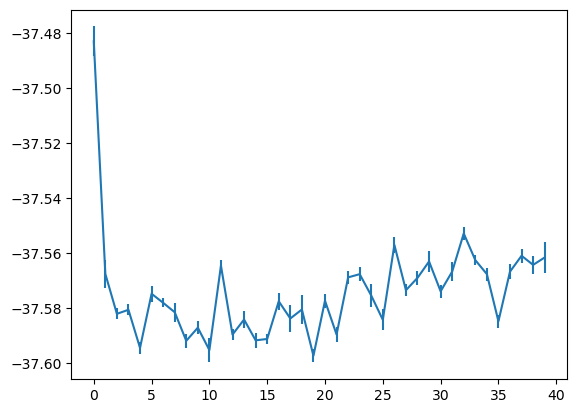

In [92]:
import matplotlib.pyplot as plt
plt.errorbar(np.arange(len(df['energy'])), np.array(df['energy']), yerr=np.array(df['error']))

<ErrorbarContainer object of 3 artists>

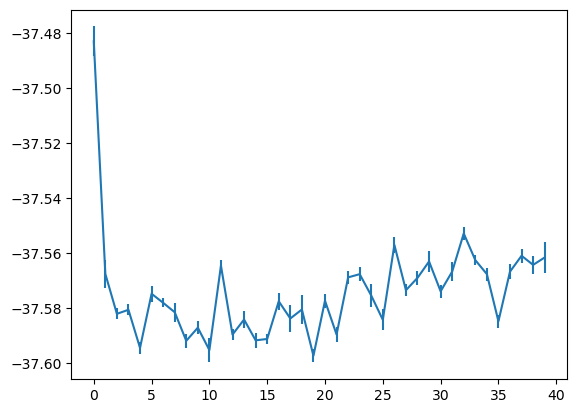

In [93]:
import matplotlib.pyplot as plt
plt.errorbar(np.arange(len(df['energy'])), np.array(df['energy']), yerr=np.array(df['error']))